In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import scipy.stats as stats
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')

In [2]:
df = pd.read_csv('../../src/data/city_growth_models/Antananarivo population.csv') 

In [3]:
df

,growth,growthRate,population,year
0,218595,0.036271,6245333,2035
1,214422,0.036891,6026738,2034
2,211345,0.037734,5812316,2033
3,207698,0.038511,5600971,2032
4,203975,0.039307,5393273,2031
...,...,...,...,...
81,2294,0.012458,186427,1954
82,2262,0.012437,184133,1953
83,2241,0.012476,181871,1952
84,2210,0.012456,179630,1951


In [4]:
print(df.isna().sum())

growth        0
growthRate    0
population    0
year          0
dtype: int64


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86 entries, 0 to 85
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   growth      86 non-null     int64  
 1   growthRate  86 non-null     float64
 2   population  86 non-null     int64  
 3   year        86 non-null     int64  
dtypes: float64(1), int64(3)
memory usage: 2.8 KB


In [6]:
df.describe()

,growth,growthRate,population,year
count,86.000000,86.000000,8.600000e+01,86.000000
mean,70557.127907,0.042355,1.693651e+06,1992.500000
std,68707.191727,0.012790,1.682421e+06,24.969982
min,0.000000,0.000000,1.774200e+05,1950.000000
25%,16019.000000,0.034021,3.820300e+05,1971.250000
50%,38571.000000,0.046691,1.072399e+06,1992.500000
75%,123745.750000,0.050424,2.454718e+06,2013.750000
max,218595.000000,0.068887,6.245333e+06,2035.000000


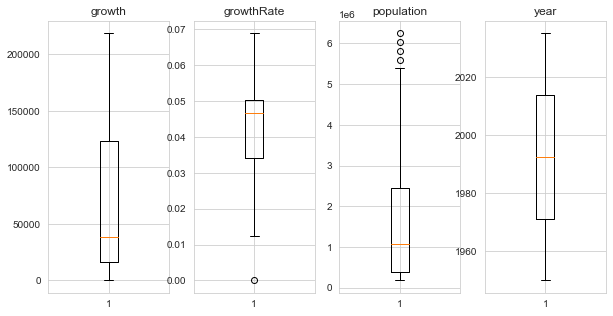

In [7]:
columns = ['growth','growthRate','population','year']
fig, axs = plt.subplots(ncols=len(columns), figsize=(10, 5))
for i, col in enumerate(columns):
    axs[i].boxplot(df[col])
    axs[i].set_title(col)
    
plt.show()

In [8]:
def detect_outliers(dataset, columns):
    df = dataset.copy()
    df[columns] = stats.zscore(df[columns])
    outliers = df[(df[columns] < -3) | (df[columns] > 3)]
    print(f"The number of outliers: {outliers.shape[0]}")
    df = df[(df[columns] > -3) & (df[columns] < 3)].reset_index(drop=True)
    return df

In [9]:
detect_outliers(df,'growthRate')

The number of outliers: 1


,growth,growthRate,population,year
0,218595,-0.478493,6245333,2035
1,214422,-0.429725,6026738,2034
2,211345,-0.363455,5812316,2033
3,207698,-0.302355,5600971,2032
4,203975,-0.239731,5393273,2031
...,...,...,...,...
80,2322,-2.351436,188749,1955
81,2294,-2.351192,186427,1954
82,2262,-2.352843,184133,1953
83,2241,-2.349834,181871,1952


In [10]:
df = df[df['growthRate'] >0]
df

,growth,growthRate,population,year
0,218595,0.036271,6245333,2035
1,214422,0.036891,6026738,2034
2,211345,0.037734,5812316,2033
3,207698,0.038511,5600971,2032
4,203975,0.039307,5393273,2031
...,...,...,...,...
80,2322,0.012455,188749,1955
81,2294,0.012458,186427,1954
82,2262,0.012437,184133,1953
83,2241,0.012476,181871,1952


In [11]:
df['City'] = 'Antananarivo' 
df['Country'] = 'Madagascar' 
df.rename(columns={'year':'Year' } , inplace=True )
df.rename(columns={'growth':'population_growth' , 'growthRate' : 'population_growth_Rate' } , inplace=True )

In [12]:
df.to_csv('../../task 2 data preprocessing/processedData/Antananarivo population_processed.csv',index=False)
